<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 2021-01-04 to 2022-10-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    451 non-null    object
 1   High    451 non-null    object
 2   Low     451 non-null    object
 3   Close   451 non-null    object
 4   Volume  451 non-null    object
dtypes: object(5)
memory usage: 21.1+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 451 entries, 2021-01-04 to 2022-10-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Open        451 non-null    object
 1   High        451 non-null    object
 2   Low         451 non-null    object
 3   Close       451 non-null    object
 4   Volume      451 non-null    object
 5   Open_Int    451 non-null    int64 
 6   High_Int    451 non-null    int64 
 7   Low_Int     451 non-null    int64 
 8   Close_Int   451 non-null    int64 
 9   Volume_Int  451

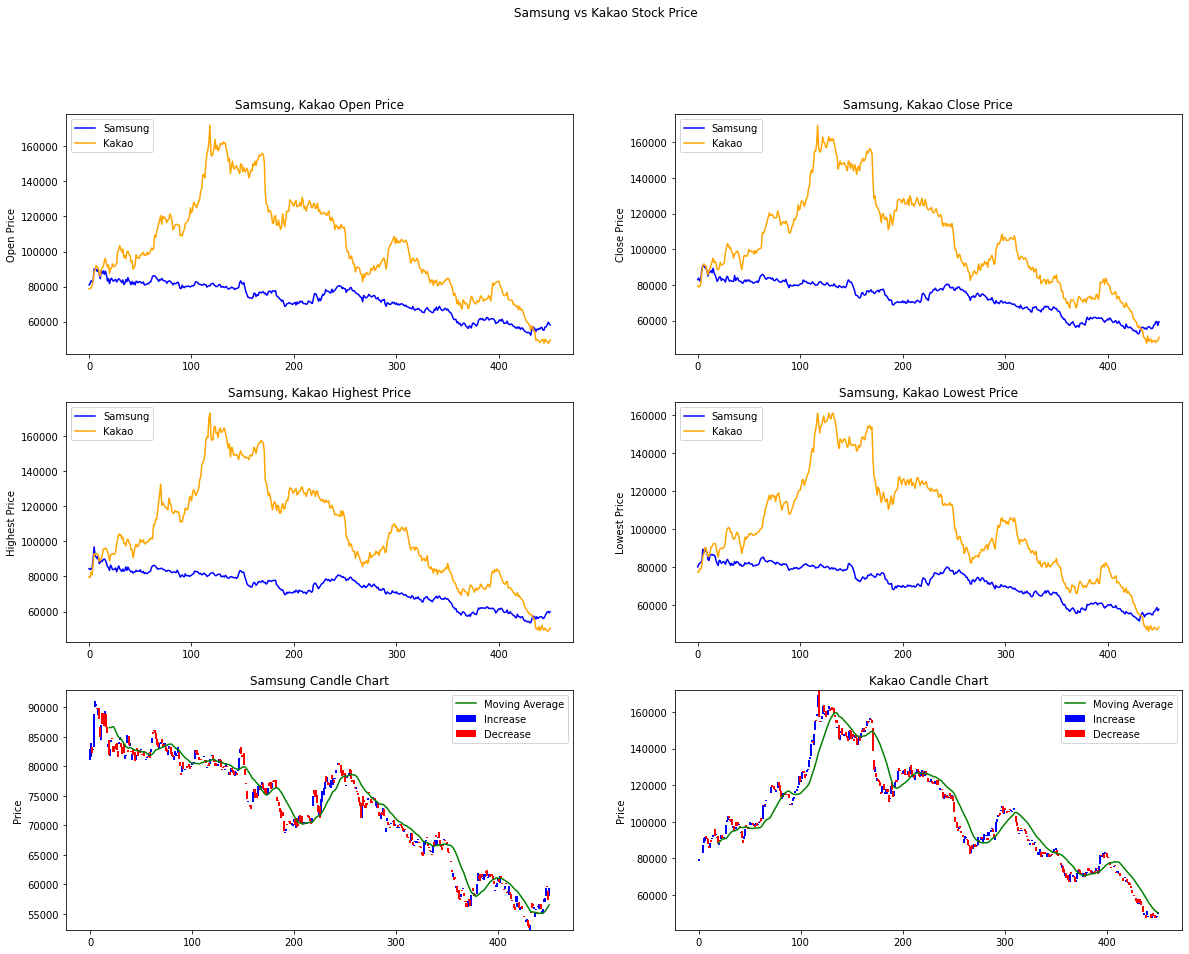

In [37]:
import matplotlib.pyplot as plt

#if cannot import the below modules
#conda install pandas-datareader
#conda install openpyxl
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

# 조회 시작 및 종료 날짜 (2021년 1월1일부터 2022년 10월 31일까지)
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 10, 31)

# 삼성전자(005930) 정보 조회 from finance.naver.com
stockSamsung = web.DataReader('005930', 'naver', start, end)
# 카카오(035720) 정보 조회 from finance.naver.com
stockKakao = web.DataReader('035720', 'naver', start, end)
# No module names 'xlwt'
# conda install xlwt
# stockKakao.to_excel('stcokKakao.xls')

# 데이터 형태 정보 출력
#stockSamsung.info()
stockKakao.info()

# 데이터 정수화
df = stockSamsung
for col in df.columns:
   df[f'{col}_Int'] = pd.to_numeric(df[col])

# 데이터 정수화
df = stockKakao
for col in df.columns:
   df[f'{col}_Int'] = pd.to_numeric(df[col])

# stockSamsung['Open_Int'] = pd.to_numeric(stockSamsung['Open'])
# stockSamsung['Close_Int'] = pd.to_numeric(stockSamsung['Close'])
# stockSamsung['High_Int'] = pd.to_numeric(stockSamsung['High'])
# stockSamsung['Low_Int'] = pd.to_numeric(stockSamsung['Low'])
# stockSamsung['Volumn_Int'] = pd.to_numeric(stockSamsung['Volumn'])

# 생성된 DataFrame 엑셀로 저장
# stcokKakao.to_excel('stcokKakao.xls')

# 데이터 형태 정보 다시 출력
#stockSamsung.info()
stockKakao.info()

# numbering index 형태로 초기화 (날짜 -> 숫자)
stockSamsung = stockSamsung.reset_index()
stockKakao = stockKakao.reset_index()

# 필요한 데이터만 추출
stockSamsung = stockSamsung[['Open_Int', 'Close_Int', 'High_Int', 'Low_Int']]
stockKakao = stockKakao[['Open_Int', 'Close_Int', 'High_Int', 'Low_Int']]

# 튀는 데이터를 포함하고 있는 행 삭제
stockKakao.drop(index=[67,68,69],inplace=True)

# 최종 데이터 출력
print(stockSamsung)
print(stockKakao)

## Figure, Subplots 등을 이용하여 그래프 출력
# 날짜순으로 그래프 출력 (x축 : index, y축:column 항목)
# 4 x 2 그래프 생성
fig, subplot = plt.subplots(nrows=3, ncols=2, figsize=(20,15)) #size 15inches x 12inced
fig.suptitle('Samsung vs Kakao Stock Price')

# [0,0] Open_Int 그래프
sp = subplot[0,0]
sp.plot(stockSamsung.index, stockSamsung['Open_Int'], label = 'Samsung', color = 'blue')
sp.plot(stockKakao.index, stockKakao['Open_Int'], label = 'Kakao', color = 'orange')
sp.set_ylabel('Open Price')
sp.legend(loc='upper left')
sp.set_title('Samsung, Kakao Open Price')

# [0,1] Close_Int 그래프
sp = subplot[0,1]
sp.plot(stockSamsung.index, stockSamsung['Close_Int'], label = 'Samsung', color = 'blue')
sp.plot(stockKakao.index, stockKakao['Close_Int'], label = 'Kakao', color = 'orange')
sp.set_ylabel('Close Price')
sp.legend(loc='upper left')
sp.set_title('Samsung, Kakao Close Price')


# [1,0] High_Int 그래프
sp = subplot[1,0]
sp.plot(stockSamsung.index, stockSamsung['High_Int'], label = 'Samsung', color = 'blue')
sp.plot(stockKakao.index, stockKakao['High_Int'], label = 'Kakao', color = 'orange')
sp.set_ylabel('Highest Price')
sp.legend(loc='upper left')
sp.set_title('Samsung, Kakao Highest Price')


# [0,1] Low_Int 그래프
sp = subplot[1,1]
sp.plot(stockSamsung.index, stockSamsung['Low_Int'], label = 'Samsung', color = 'blue')
sp.plot(stockKakao.index, stockKakao['Low_Int'], label = 'Kakao', color = 'orange')
sp.set_ylabel('Lowest Price')
sp.legend(loc='upper left')
sp.set_title('Samsung, Kakao Lowest Price')


# [2,0] 삼성주가 Candle chart
increase = stockSamsung[stockSamsung['Close_Int']>=stockSamsung['Open_Int']]
decrease = stockSamsung[stockSamsung['Close_Int']<stockSamsung['Open_Int']]
sp = subplot[2,0]
sp.bar(increase.index, increase['Close_Int']-increase['Open_Int'], bottom = increase['Open_Int'], width=2, label = 'Increase', color = 'blue')
sp.bar(decrease.index, decrease['Close_Int']-decrease['Open_Int'], bottom = decrease['Open_Int'], width=2, label = 'Decrease', color = 'red')

sp.set_ylabel('Price')
# sp.legend(loc='upper right')
sp.set_title('Samsung Candle Chart')

# [2,1] 카카오주가 Candle chart
increase = stockKakao[stockKakao['Close_Int']>=stockKakao['Open_Int']]
decrease = stockKakao[stockKakao['Close_Int']<stockKakao['Open_Int']]
sp = subplot[2,1]
sp.bar(increase.index, increase['Close_Int']-increase['Open_Int'], bottom = increase['Open_Int'], width=2, label = 'Increase', color = 'blue')
sp.bar(decrease.index, decrease['Close_Int']-decrease['Open_Int'], bottom = decrease['Open_Int'], width=2, label = 'Decrease', color = 'red')

sp.set_ylabel('Price')
# sp.legend(loc='upper right')
sp.set_title('Kakao Candle Chart')

# [2.0] Samsung 주가의 20일 평균 이평선(Moving Average)
stockSamsung['평균이평선'] = stockSamsung['Close_Int'].rolling(window=20).mean()
sp = subplot[2,0]
sp.plot(stockSamsung.index, stockSamsung['평균이평선'], label = 'Moving Average', color = 'green')
sp.legend(loc='upper right')


# [2.1] Kakao 주가의 20일 평균 이평선(Moving Average)
stockKakao['평균이평선'] = stockKakao['Close_Int'].rolling(window=20).mean()
sp = subplot[2,1]
sp.plot(stockKakao.index, stockKakao['평균이평선'], label = 'Moving Average', color = 'green')
sp.legend(loc='upper right')


plt.show()